# Cleaning for Random Forest 

In [38]:
from taxipred.utils.constants import TAXI_DATA
import pandas as pd

df = pd.read_csv(TAXI_DATA)

df.head(5)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


Since random forest is sensetive to outliers i will be checking all of them 

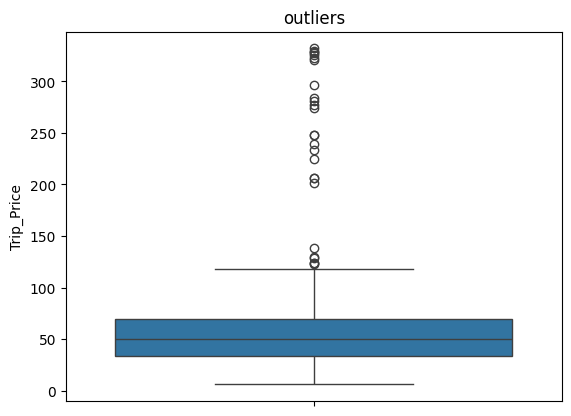

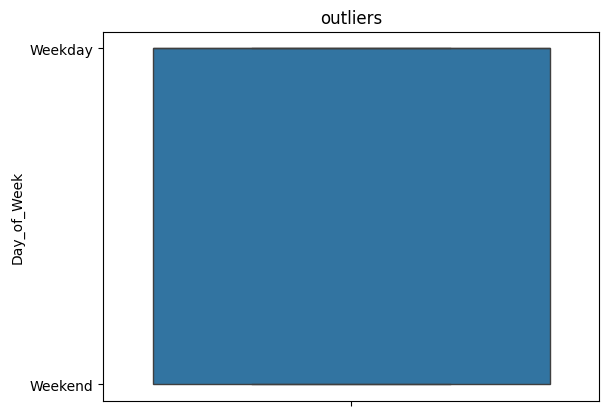

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(df["Trip_Price"])
plt.title("outliers")
plt.show()


sns.boxplot(df["Day_of_Week"])
plt.title("outliers")
plt.show()

In [40]:
df_drop = df.drop(columns=["Weather", "Traffic_Conditions"])
df_drop

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,2.67,0.82,0.17,114.94,61.2090


In [41]:
df_drop["Passenger_Count"] = df_drop["Passenger_Count"].astype('Int64')
df_drop.head(5)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3,2.93,0.63,0.32,22.64,15.6180


In [47]:
df_drop_en = pd.get_dummies(df_drop, columns=["Day_of_Week"], drop_first=True, dtype=int)
df_clean = pd.get_dummies(df_drop_en, columns=["Time_of_Day"], drop_first=True, dtype=int)
df_clean

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Day_of_Week_Weekend,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night
0,19.35,3,3.56,0.80,0.32,53.82,36.2624,0,0,1,0
1,47.59,1,NaN,0.62,0.43,40.57,NaN,0,0,0,0
2,36.87,1,2.70,1.21,0.15,37.27,52.9032,1,1,0,0
3,30.33,4,3.48,0.51,0.15,116.81,36.4698,0,1,0,0
4,NaN,3,2.93,0.63,0.32,22.64,15.6180,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,4,2.39,0.62,0.49,58.39,34.4049,1,0,0,0
996,45.95,4,3.12,0.61,NaN,61.96,62.1295,0,0,0,1
997,7.70,3,2.08,1.78,NaN,54.18,33.1236,0,0,1,0
998,47.56,1,2.67,0.82,0.17,114.94,61.2090,0,0,1,0


In [48]:
df_clean.dropna()


,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Day_of_Week_Weekend,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night
0,19.35,3,3.56,0.80,0.32,53.82,36.2624,0,0,1,0
2,36.87,1,2.70,1.21,0.15,37.27,52.9032,1,1,0,0
3,30.33,4,3.48,0.51,0.15,116.81,36.4698,0,1,0,0
5,8.64,2,2.55,1.71,0.48,89.33,60.2028,1,0,0,0
12,41.79,3,4.60,1.77,0.11,86.95,88.1328,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
990,40.17,3,3.81,0.66,0.42,62.66,56.6394,0,1,0,0
992,14.34,1,3.23,1.01,0.29,45.07,30.7837,0,0,0,0
994,18.69,3,4.90,1.79,0.17,79.41,51.8548,0,1,0,0
995,5.49,4,2.39,0.62,0.49,58.39,34.4049,1,0,0,0


removing the catagorical colums form this 

In [49]:
columns = ["Trip_Distance_km", "Passenger_Count", "Base_Fare", "Per_Km_Rate", 
           "Per_Minute_Rate", "Trip_Duration_Minutes", "Trip_Price", "Day_of_Week_Weekend",
                "Time_of_Day_Evening", "Time_of_Day_Morning", "Time_of_Day_Night"]

for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
    
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

In [50]:
df_clean

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Day_of_Week_Weekend,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night
0,19.35,3,3.56,0.80,0.32,53.82,36.2624,0,0,1,0
5,8.64,2,2.55,1.71,0.48,89.33,60.2028,1,0,0,0
16,15.91,4,4.42,1.77,0.21,114.93,56.7160,0,0,1,0
17,26.71,4,4.30,1.59,0.20,111.18,69.0049,1,0,0,0
20,30.98,1,4.50,0.84,0.25,57.02,44.7782,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
987,22.31,2,3.15,1.94,0.31,26.43,54.6247,0,0,0,0
988,13.07,2,3.27,1.40,0.19,16.47,24.6973,1,0,0,0
992,14.34,1,3.23,1.01,0.29,45.07,30.7837,0,0,0,0
995,5.49,4,2.39,0.62,0.49,58.39,34.4049,1,0,0,0


In [51]:
df_clean.to_csv("../data/random_forest.csv", index=False)